In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(432)

In [86]:
data = pd.read_csv('Data/brca_metabric_clinical_data.tsv', sep='\t', header=0)

In [87]:
def nottingham_partition(data):
    nottingham_bins = [0, 2.4, 3.4, 5.4, 100]
    labels = [1, 2, 3, 4]
    data['Nottingham Partition'] = pd.cut(data['Nottingham prognostic index'], bins=nottingham_bins, labels=labels, include_lowest=False)
    
    nottingham_1 = data[data['Nottingham Partition'] == 1]
    nottingham_2 = data[data['Nottingham Partition'] == 2]
    nottingham_3 = data[data['Nottingham Partition'] == 3]
    nottingham_4 = data[data['Nottingham Partition'] == 4]
    
    nottingham_df_list = [nottingham_1, nottingham_2, nottingham_3, nottingham_4]

    return nottingham_df_list


In [88]:
def survival_probs(nottingham_df_list, type='full'):
    
    out_df = None
    i = 0
    nott_bins = ['2.0-2.4', '2.4-3.4', '3.4-5.4', '>5.4']
    for df in nottingham_df_list:
        df = df[~pd.isna(df['Patient\'s Vital Status'])]
        df = df[~pd.isna(df['Overall Survival (Months)'])]
      
        year_survival = sum(df['Overall Survival (Months)'] >= 60) / len(df)
        #print('5-Year Survival:', year_survival)
        year_death = sum(df['Overall Survival (Months)'] < 60) / len(df)
       # print('5-Year Death:', year_death)
        
        death_rate_under = sum((df['Overall Survival (Months)'] < 60) & (df['Patient\'s Vital Status'] == 'Died of Disease')) / sum(df['Overall Survival (Months)'] < 60)
       # print('Under 5-year disease death rate:', death_rate_under)
        
        prob = year_death * death_rate_under
        #print('P(Dying from the disease in <5 Years):', prob)
        #print('P(NOT dying from the disease in <5 Years):', 1-prob, '\n')
        
        row = pd.DataFrame({'Type': [type], 'Nottingham Index': [nott_bins[i]] , '5-Year Survival Probability': [1-prob]})
        
        if out_df is None:
            out_df = row
        else:
            out_df= pd.concat([out_df, row])
        
        i += 1
    return out_df

In [89]:
full_nottingham = nottingham_partition(data)
full_probs = survival_probs(full_nottingham)

In [90]:
ductal_data = data[data['Cancer Type Detailed'] == 'Breast Invasive Ductal Carcinoma']
ductal_nottingham = nottingham_partition(ductal_data)
ductal_df = survival_probs(ductal_nottingham, 'ductal')
ductal_df

/var/folders/5w/r4vhmg150j1br8m5s45ns0r40000gn/T/ipykernel_21977/3937379363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nottingham Partition'] = pd.cut(data['Nottingham prognostic index'], bins=nottingham_bins, labels=labels, include_lowest=False)


,Type,Nottingham Index,5-Year Survival Probability
0,ductal,2.0-2.4,0.932692
0,ductal,2.4-3.4,0.929825
0,ductal,3.4-5.4,0.815618
0,ductal,>5.4,0.541667


In [91]:
lobular_data = data[data['Cancer Type Detailed'] == 'Breast Invasive Lobular Carcinoma']
lobular_nottingham = nottingham_partition(lobular_data)
survival_probs(lobular_nottingham)
lobular_df = survival_probs(lobular_nottingham, 'lobular')
lobular_df

/var/folders/5w/r4vhmg150j1br8m5s45ns0r40000gn/T/ipykernel_21977/3937379363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nottingham Partition'] = pd.cut(data['Nottingham prognostic index'], bins=nottingham_bins, labels=labels, include_lowest=False)


,Type,Nottingham Index,5-Year Survival Probability
0,lobular,2.0-2.4,0.941176
0,lobular,2.4-3.4,0.924528
0,lobular,3.4-5.4,0.781250
0,lobular,>5.4,0.500000


In [92]:
mixed_data = data[data['Cancer Type Detailed'] == 'Breast Mixed Ductal and Lobular Carcinoma']
mixed_nottingham = nottingham_partition(mixed_data)
mixed_df = survival_probs(mixed_nottingham, 'mixed')
mixed_df

/var/folders/5w/r4vhmg150j1br8m5s45ns0r40000gn/T/ipykernel_21977/3937379363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nottingham Partition'] = pd.cut(data['Nottingham prognostic index'], bins=nottingham_bins, labels=labels, include_lowest=False)


,Type,Nottingham Index,5-Year Survival Probability
0,mixed,2.0-2.4,0.937500
0,mixed,2.4-3.4,0.972222
0,mixed,3.4-5.4,0.813187
0,mixed,>5.4,0.687500


In [93]:
expected = pd.DataFrame({'Type': ['Expected']*4, 'Nottingham Index': ['2.0-2.4', '2.4-3.4', '3.4-5.4', '>5.4'] , '5-Year Survival Probability': [0.93, 0.85, 0.7, 0.5]})
combined_df = pd.concat([full_probs, ductal_df, lobular_df, mixed_df, expected])
combined_df

,Type,Nottingham Index,5-Year Survival Probability
0,full,2.0-2.4,0.934066
0,full,2.4-3.4,0.937751
0,full,3.4-5.4,0.813636
0,full,>5.4,0.552764
0,ductal,2.0-2.4,0.932692
0,ductal,2.4-3.4,0.929825
0,ductal,3.4-5.4,0.815618
0,ductal,>5.4,0.541667
0,lobular,2.0-2.4,0.941176
0,lobular,2.4-3.4,0.924528


<Axes: xlabel='Nottingham Index', ylabel='5-Year Survival Probability'>

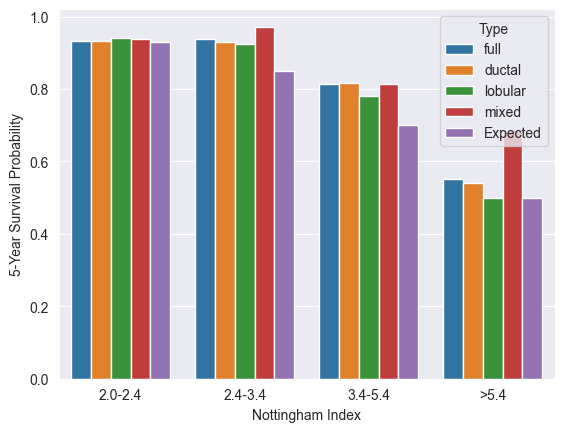

In [94]:
sns.barplot(combined_df, x='Nottingham Index', y='5-Year Survival Probability', hue='Type')